# Applied Data Science Capstone Project (Coursera)
## Battle of the Neighborhoods (Week 2) - Clustering Philippine Cities
By: D. Fenix

## Table of Contents
* [Introduction](#introduction)
* [Data Preparation](#dataprep)
* [Exploration - One City](#exploration)
* [Processing - All Cities](#processing)
* [Clustering the Cities](#clustering)
* [Results and Discussion](#results)
* [Conclusion](#conclusion)

<a id='introduction'></a>
## Introduction

In 2020, the Philippine government instituted a program called 'Balik Probinsya' that encourages residents in the congested urban areas to move back to the provinces. In this project, we will cluster Philippine cities in order to help urban residents identify potential places for relocation and aid local governments to plan and incentivize the types of venues that attract potential relocatees.

The following **DATA** are needed to cluster Philippine cities:
* List of Philippine cities (Wikipedia)
* Geographic coordinates each city (Wikipedia)
* Venues and venue categories found in each city within a defined radius (Foursquare API)

<a id='dataprep'></a>
## Data Preparation

Import packages that will be used.

In [1]:
import pandas as pd
#from bs4 import BeautifulSoup
import requests
import numpy as np

#from geopy.geocoders import Nominatim # convert an address into latitude and longitude values
from pandas.io.json import json_normalize  # tranform JSON file into a pandas dataframe

# import k-means from clustering stage
from sklearn.cluster import KMeans

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

In [2]:
pip install openpyxl

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install lxml

Note: you may need to restart the kernel to use updated packages.


List of Philippine cities is from Wikipedia. 
The first step is to create a dataframe by reading the Wikipedia table. Although the table in the website does not show the coordinates, information is available in the backend table.

In [4]:
link = "https://en.wikipedia.org/wiki/List_of_cities_in_the_Philippines"
tables = pd.read_html(link, encoding='utf-8')
df = tables[1].iloc[0:]
df.columns = ["Coordinates", "City", "Population", "Area", "Density", "Province", "Region", "Legal Class", "Charter",
                                 "Approval Date", "Ratification Date"]
df.head()

,Coordinates,City,Population,Area,Density,Province,Region,Legal Class,Charter,Approval Date,Ratification Date
0,16°09′23″N 119°58′49″E﻿ / ﻿16.1565°N 119.9804°E,Alaminos,89708,164.26 km2(63.42 sq mi),"550/km2(1,400/sq mi)",Pangasinan,I,CC,RA 09025 [7],"March 5, 2001 [7]","March 28, 2001 [8]"
1,15°08′24″N 120°35′16″E﻿ / ﻿15.1399°N 120.5879°E,Angeles,"411,634 [vi]",60.27 km2(23.27 sq mi),"6,200/km2(16,000/sq mi)",Pampanga,III,HUC,RA 03700 [9],"June 22, 1963 [9]","January 1, 1964"
2,14°35′13″N 121°10′33″E﻿ / ﻿14.5870°N 121.1758°E,Antipolo,776386,306.10 km2(118.19 sq mi),"2,500/km2(6,500/sq mi)",Rizal,IV-A,CC,RA 08508 [10],"February 13, 1998 [10]","April 4, 1998"
3,10°40′34″N 122°57′05″E﻿ / ﻿10.6762°N 122.9513°E,Bacolod,561875,162.67 km2(62.81 sq mi),"3,500/km2(9,100/sq mi)",Negros Occidental,VI,HUC,CA 326 [11],"June 18, 1938 [12]","October 19, 1938 [13]"
4,14°27′34″N 120°56′24″E﻿ / ﻿14.4594°N 120.9401°E,Bacoor,600609,46.17 km2(17.83 sq mi),"13,000/km2(34,000/sq mi)",Cavite,IV-A,CC,RA 10160 [14],"April 10, 2012 [14]","June 23, 2012 [15]"


In [5]:
df

,Coordinates,City,Population,Area,Density,Province,Region,Legal Class,Charter,Approval Date,Ratification Date
0,16°09′23″N 119°58′49″E﻿ / ﻿16.1565°N 119.9804°E,Alaminos,89708,164.26 km2(63.42 sq mi),"550/km2(1,400/sq mi)",Pangasinan,I,CC,RA 09025 [7],"March 5, 2001 [7]","March 28, 2001 [8]"
1,15°08′24″N 120°35′16″E﻿ / ﻿15.1399°N 120.5879°E,Angeles,"411,634 [vi]",60.27 km2(23.27 sq mi),"6,200/km2(16,000/sq mi)",Pampanga,III,HUC,RA 03700 [9],"June 22, 1963 [9]","January 1, 1964"
2,14°35′13″N 121°10′33″E﻿ / ﻿14.5870°N 121.1758°E,Antipolo,776386,306.10 km2(118.19 sq mi),"2,500/km2(6,500/sq mi)",Rizal,IV-A,CC,RA 08508 [10],"February 13, 1998 [10]","April 4, 1998"
3,10°40′34″N 122°57′05″E﻿ / ﻿10.6762°N 122.9513°E,Bacolod,561875,162.67 km2(62.81 sq mi),"3,500/km2(9,100/sq mi)",Negros Occidental,VI,HUC,CA 326 [11],"June 18, 1938 [12]","October 19, 1938 [13]"
4,14°27′34″N 120°56′24″E﻿ / ﻿14.4594°N 120.9401°E,Bacoor,600609,46.17 km2(17.83 sq mi),"13,000/km2(34,000/sq mi)",Cavite,IV-A,CC,RA 10160 [14],"April 10, 2012 [14]","June 23, 2012 [15]"
...,...,...,...,...,...,...,...,...,...,...,...
143,10°53′46″N 123°04′21″E﻿ / ﻿10.8962°N 123.0726°E,Victorias,87933,133.92 km2(51.71 sq mi),"660/km2(1,700/sq mi)",Negros Occidental,VI,CC,RA 08488 [189],"February 11, 1998 [189]","March 21, 1998"
144,17°34′22″N 120°23′12″E﻿ / ﻿17.5729°N 120.3867°E,Vigan,53879,25.12 km2(9.70 sq mi),"2,100/km2(5,400/sq mi)",Ilocos Sur,I,CC,RA 08988 [190],"December 27, 2000 [190]","January 22, 2001"
145,6°54′17″N 122°04′35″E﻿ / ﻿6.9046°N 122.0763°E,Zamboanga City,861799,"1,414.70 km2(546.22 sq mi)","580/km2(1,500/sq mi)",Zamboanga del Sur [ii],IX,HUC,CA 039 [191],"October 12, 1936 [191]","February 26, 1937 [192]"
146,Table notes ^ Land area figures are taken from...,Table notes ^ Land area figures are taken from...,Table notes ^ Land area figures are taken from...,Table notes ^ Land area figures are taken from...,Table notes ^ Land area figures are taken from...,Table notes ^ Land area figures are taken from...,Table notes ^ Land area figures are taken from...,Table notes ^ Land area figures are taken from...,Table notes ^ Land area figures are taken from...,Table notes ^ Land area figures are taken from...,Table notes ^ Land area figures are taken from...


Rows 146 and 147 are not data rows so they need to be deleted.

In [6]:
# Drop rows that should not be included
df_orig =df.copy()
df_clean= df.drop([146, 147])  # will drop the rows

Some cities in the Philippines have the same name, like Naga which exists in the provinces Cebu and Camarines Sur. To make the distinction, the Province name will be appended to the City name. We create a dataframe of Province names.

In [7]:
province = df_clean['Province'].copy()
province

0                  Pangasinan
1                    Pampanga
2                       Rizal
3           Negros Occidental
4                      Cavite
                ...          
141                  Bukidnon
142               none [xiii]
143         Negros Occidental
144                Ilocos Sur
145    Zamboanga del Sur [ii]
Name: Province, Length: 146, dtype: object

Looking at the list of Province names, some have values containing none (e.g. Row 142). The next step is to check what cities have unassigned Province.

In [8]:
no_province=df_clean[df_clean['Province'].str.contains('none')]
no_province

,Coordinates,City,Population,Area,Density,Province,Region,Legal Class,Charter,Approval Date,Ratification Date
27,14°39′26″N 120°59′03″E﻿ / ﻿14.6571°N 120.9841°E,Caloocan,1583978,53.33 km2(20.59 sq mi),"30,000/km2(78,000/sq mi)",none [vii],NCR,HUC,RA 03278 [48],"June 17, 1961 [48]","February 16, 1962"
65,14°28′50″N 120°58′55″E﻿ / ﻿14.4806°N 120.9819°E,Las Piñas,588894,32.69 km2(12.62 sq mi),"18,000/km2(47,000/sq mi)",none [viii],NCR,HUC,RA 08251 [95],"February 12, 1997 [95]","March 26, 1997"
72,14°33′24″N 121°01′25″E﻿ / ﻿14.5568°N 121.0235°E,Makati,"582,602 [x]",21.57 km2(8.33 sq mi) [x],"27,000/km2(70,000/sq mi)",none [viii],NCR,HUC,RA 07854 [104],"January 2, 1995 [104]","February 4, 1995"
73,14°40′31″N 120°57′26″E﻿ / ﻿14.6752°N 120.9573°E,Malabon,365525,15.71 km2(6.07 sq mi),"23,000/km2(60,000/sq mi)",none [viii],NCR,HUC,RA 09019 [105],"March 5, 2001 [105]","April 21, 2001"
76,14°34′39″N 121°02′00″E﻿ / ﻿14.5774°N 121.0334°E,Mandaluyong,386276,21.26 km2(8.21 sq mi),"18,000/km2(47,000/sq mi)",none [viii],NCR,HUC,RA 07675 [109],"February 9, 1994 [109]","April 10, 1994"
78,14°35′26″N 120°58′48″E﻿ / ﻿14.5906°N 120.9799°E,Manila,1780148,42.88 km2(16.56 sq mi),"42,000/km2(110,000/sq mi)",none,NCR,HUC,Act 0183 [112],"July 31, 1901 [112]","July 31, 1901"
80,14°37′59″N 121°05′57″E﻿ / ﻿14.6331°N 121.0993°E,Marikina,450741,21.52 km2(8.31 sq mi),"21,000/km2(54,000/sq mi)",none [viii],NCR,HUC,RA 08223 [115],"November 6, 1996 [115]","December 7, 1996"
85,15°42′47″N 120°54′15″E﻿ / ﻿15.7131°N 120.9041°E,Muntinlupa,504509,39.75 km2(15.35 sq mi),"13,000/km2(34,000/sq mi)",none [viii],NCR,HUC,RA 07926 [121],"March 1, 1995 [121]","May 8, 1995"
88,14°39′25″N 120°56′52″E﻿ / ﻿14.6569°N 120.9478°E,Navotas,249463,10.77 km2(4.16 sq mi),"28,000/km2(73,000/sq mi)",none [viii],NCR,HUC,RA 09387 [124],"March 10, 2007 [124]","June 24, 2007 [25]"
96,14°30′03″N 120°59′29″E﻿ / ﻿14.5007°N 120.9915°E,Parañaque,665822,47.69 km2(18.41 sq mi),"14,000/km2(36,000/sq mi)",none [viii],NCR,HUC,RA 08507 [134],"February 13, 1998 [134]","March 22, 1998"


The cities with unassigned province are located in Metro Manila. While not technically a province, it will be used for tagging. Replace none with Metro Manila in the dataframe containing Province names.

In [9]:
# Find province containing none
province.loc[province.str.contains('none', case=False)] = 'Metro Manila'

This next step validates that there are no more unassigned provinces.

In [10]:
province_fix=province[province.str.contains("none")]
province_fix

Series([], Name: Province, dtype: object)

The new City field is created as a combination of City and Province. Columns that are not needed are also dropped.

In [11]:
df_clean['City']=df_clean['City'].str.cat(province, sep=", ")

# Drop columns that will not be used
df_clean = df_clean.drop(['Province','Legal Class', 'Charter','Approval Date', 'Ratification Date','Region'], axis=1)
df_clean.head()

,Coordinates,City,Population,Area,Density
0,16°09′23″N 119°58′49″E﻿ / ﻿16.1565°N 119.9804°E,"Alaminos, Pangasinan",89708,164.26 km2(63.42 sq mi),"550/km2(1,400/sq mi)"
1,15°08′24″N 120°35′16″E﻿ / ﻿15.1399°N 120.5879°E,"Angeles, Pampanga","411,634 [vi]",60.27 km2(23.27 sq mi),"6,200/km2(16,000/sq mi)"
2,14°35′13″N 121°10′33″E﻿ / ﻿14.5870°N 121.1758°E,"Antipolo, Rizal",776386,306.10 km2(118.19 sq mi),"2,500/km2(6,500/sq mi)"
3,10°40′34″N 122°57′05″E﻿ / ﻿10.6762°N 122.9513°E,"Bacolod, Negros Occidental",561875,162.67 km2(62.81 sq mi),"3,500/km2(9,100/sq mi)"
4,14°27′34″N 120°56′24″E﻿ / ﻿14.4594°N 120.9401°E,"Bacoor, Cavite",600609,46.17 km2(17.83 sq mi),"13,000/km2(34,000/sq mi)"


The next step is to process the columns to make the data easier to use. For example, Area is shown in km2 and sq mi units. This column will be split into 2. Same with Density and Coordinates. Metric units will be retained, which is the standard in the Philippines.

In [12]:
df_clean[['Coord1', 'Coord2']] = df_clean['Coordinates'].str.split("/", expand=True)
df_clean[['Area_sqkm', 'Area_sqmi']] = df_clean['Area'].str.split("km2", expand=True)
df_clean[['Density_sqkm', 'Density_sqmi']] = df_clean['Density'].str.split("/km2", expand=True)
df_clean[['Latitude', 'Longitude']] = df_clean['Coord2'].str.split("N", expand=True)
# Drop extra columns
df_clean2 = df_clean.copy().drop(['Coordinates','Area', 'Density','Area_sqmi','Density_sqmi','Coord1', 'Coord2'], axis=1)

# Retain only numeric value in Longitude and Latitude columns
df_clean2['Longitude']=df_clean2['Longitude'].str.replace('E', '')
df_clean2['Latitude']=df_clean2['Latitude'].str[:-1]
df_clean2['Longitude']=df_clean2['Longitude'].str[:-1]
df_clean2

,City,Population,Area_sqkm,Density_sqkm,Latitude,Longitude
0,"Alaminos, Pangasinan",89708,164.26,550,﻿16.1565,119.9804
1,"Angeles, Pampanga","411,634 [vi]",60.27,"6,200",﻿15.1399,120.5879
2,"Antipolo, Rizal",776386,306.10,"2,500",﻿14.5870,121.1758
3,"Bacolod, Negros Occidental",561875,162.67,"3,500",﻿10.6762,122.9513
4,"Bacoor, Cavite",600609,46.17,"13,000",﻿14.4594,120.9401
...,...,...,...,...,...,...
141,"Valencia, Bukidnon",192993,587.29,330,﻿7.9028,125.0898
142,"Valenzuela, Metro Manila",620422,47.02,"13,000",﻿14.7077,120.9462
143,"Victorias, Negros Occidental",87933,133.92,660,﻿10.8962,123.0726
144,"Vigan, Ilocos Sur",53879,25.12,"2,100",﻿17.5729,120.3867


Check the datatypes. All the datatypes are currently object so numeric data will be converted to int or float. Commas in the numeric values are removed and columns are converted to the right types.

In [13]:
df_clean2.dtypes

City            object
Population      object
Area_sqkm       object
Density_sqkm    object
Latitude        object
Longitude       object
dtype: object

In [14]:
# Remove commas in numeric variables
df_clean2['Density_sqkm']=df_clean2['Density_sqkm'].str.replace(',', '') #works
df_clean2['Area_sqkm']=df_clean2['Area_sqkm'].str.replace(',', '') #noerror
df_clean2['Population']=df_clean2['Population'].str.replace(',', '') #works
df_clean2['Longitude']=df_clean2['Longitude'].str.replace(',', '') #noerror
df_clean2['Latitude']=df_clean2['Latitude'].str.replace(',', '') #noerror
subset2=df_clean2.copy()

In [15]:
subset2["Density_sqkm"]=subset2["Density_sqkm"].apply(pd.to_numeric) #works - int
subset2["Longitude"]=subset2["Longitude"].apply(pd.to_numeric) #works - float64

# Strip extra spaces from Longitude and Latitude
subset2["Latitude"]=subset2["Latitude"].str.lstrip()
subset2["Latitude"]=subset2["Latitude"].str.rstrip()
subset2['Latitude']=subset2['Latitude'].str.replace(u'\ufeff', '') #encoding characters need to be stripped
subset2["Latitude"]=subset2["Latitude"].apply(pd.to_numeric) 

subset2["Area_sqkm"]=subset2["Area_sqkm"].str.rstrip()
subset2["Area_sqkm"]=subset2["Area_sqkm"].apply(pd.to_numeric) #works

# Population has extra characters that need to be removed before type can be changed
subset2['Population']=subset2['Population'].str.replace("[][vix]", '')
subset2["Population"]=subset2["Population"].str.rstrip()
subset2["Population"]=subset2["Population"].apply(pd.to_numeric)

In [16]:
subset2.dtypes

City             object
Population        int64
Area_sqkm       float64
Density_sqkm      int64
Latitude        float64
Longitude       float64
dtype: object

Some values in the Population column have non-numeric characters that need to be removed in order to make the column numeric.

In [17]:
# This code finds the rows with non-numeric characters in Population but fix is addressed in preceding code
firxrow_orig = df_clean2.copy()
fixrows=firxrow_orig[firxrow_orig["Population"].str.contains("[[]")]
fixrows

,City,Population,Area_sqkm,Density_sqkm,Latitude,Longitude
1,"Angeles, Pampanga",411634 [vi],60.27,6200,﻿15.1399,120.5879
71,"Mabalacat, Pampanga",250799 [ix],83.18,3000,﻿15.2228,120.5733
72,"Makati, Metro Manila",582602 [x],21.57,27000,﻿14.5568,121.0235
98,"Pasig, Metro Manila",755300 [xi],31.00,16000,﻿14.5605,121.0767
127,"Taguig, Metro Manila",804915 [xii],53.67,15000,﻿14.5266,121.0744


The next step is to sort the cities by decreasing density to get a sense of what cities might have more outgoing relocation potential. As expected the cities in Metro Manila are at the top of the list.

In [18]:
# Sort by density
subset2=subset2.sort_values(by='Density_sqkm',ascending=False)
clusterlist=subset2.copy()

# Update the index
clusterlist.index = range(1,len(clusterlist) + 1)
clusterlist

,City,Population,Area_sqkm,Density_sqkm,Latitude,Longitude
1,"Manila, Metro Manila",1780148,42.88,42000,14.5906,120.9799
2,"Pasay, Metro Manila",416522,13.97,30000,14.5437,120.9954
3,"Caloocan, Metro Manila",1583978,53.33,30000,14.6571,120.9841
4,"Navotas, Metro Manila",249463,10.77,28000,14.6569,120.9478
5,"Makati, Metro Manila",582602,21.57,27000,14.5568,121.0235
...,...,...,...,...,...,...
142,"Tabuk, Kalinga",110642,700.25,160,17.4136,121.4440
143,"Bayugan, Agusan del Sur",103202,688.77,150,8.7143,125.7481
144,"Borongan, Eastern Samar",69297,475.00,150,11.6085,125.4353
145,"Ilagan, Isabela",145568,1166.26,120,17.1442,121.8889


In [19]:
clusterlist.describe()

,Population,Area_sqkm,Density_sqkm,Latitude,Longitude
count,1.460000e+02,146.000000,146.000000,146.000000,146.000000
mean,2.815388e+05,260.290000,4040.136986,12.110360,122.604047
std,3.542287e+05,344.146301,7168.604922,3.154151,1.769553
min,4.104100e+04,5.950000,110.000000,6.113900,118.735000
25%,1.055082e+05,78.807500,400.000000,9.664775,120.992475
50%,1.687515e+05,165.320000,910.000000,12.218700,122.696600
75%,3.317580e+05,298.907500,3850.000000,14.589700,123.883875
max,2.936116e+06,2443.610000,42000.000000,18.197300,126.316600


Visually examine cities data.

array([[<AxesSubplot:title={'center':'Density_sqkm'}>]], dtype=object)

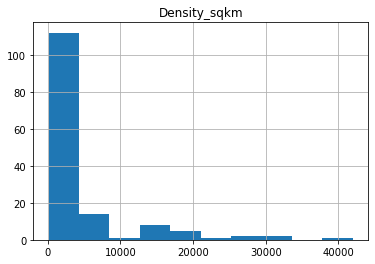

In [20]:
# Create histogram.
clusterlist.hist(column='Density_sqkm')

<AxesSubplot:xlabel='Population', ylabel='Area_sqkm'>

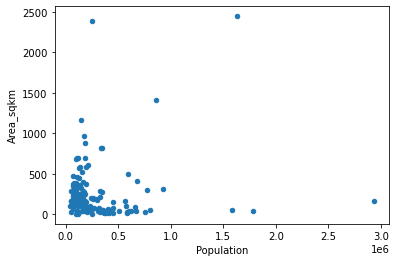

In [21]:
# Create scatter plot
clusterlist.plot.scatter(x = 'Population', y = 'Area_sqkm')

Dataframe is ready to be used for the Foursquare API.

<a id='exploration'></a>
## Exploration - One City

In [1]:
# Foursquare credentials
CLIENT_ID = 'removed' # your Foursquare ID
CLIENT_SECRET = 'removed' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
LIMIT = 100 # A default Foursquare API limit value

print('Your credentials:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentials:
CLIENT_ID: removed
CLIENT_SECRET:removed


Explore data for the first location - Manila.

In [23]:
# Explore data for the first location
clusterlist.loc[1,'City']

'Manila, Metro Manila'

In [24]:
neighborhood_latitude = clusterlist.loc[1, 'Latitude'] # neighborhood latitude value
neighborhood_longitude = clusterlist.loc[1, 'Longitude'] # neighborhood longitude value
neighborhood_name = clusterlist.loc[1, 'City'] # neighborhood name
print('Latitude and longitude values of {} are {}, {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))

Latitude and longitude values of Manila, Metro Manila are 14.5906, 120.9799.


In [25]:
LIMIT = 200 # limit of number of venues returned by Foursquare API
radius = 1000 # define radius
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)
url # display URL

'https://api.foursquare.com/v2/venues/explore?&client_id=H0XAPMK4O3BAKZBXT305KFI0CGQMMLZ51RJANLCEKGT5HISF&client_secret=X5VFAER4HNVY4S42FOGUWFZWIFOIQKBNBUH4A3CZEVOAYRQA&v=20180605&ll=14.5906,120.9799&radius=1000&limit=200'

In [26]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5fd7eb412e172d2de050c80f'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'Intramuros',
  'headerFullLocation': 'Intramuros, Manila',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 107,
  'suggestedBounds': {'ne': {'lat': 14.599600009000008,
    'lng': 120.98918256285081},
   'sw': {'lat': 14.581599990999992, 'lng': 120.97061743714919}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '508b95a9e4b07e54b3135fbc',
       'name': 'Adobo Connection',
       'location': {'address': 'SM Manila',
        'lat': 14.590246282346405,
        'lng': 120.98234882954999,
        'labeledLatLngs': [{'label': 'display',
          'lat': 14.59

In [27]:
# Function to extract category of the venues
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [28]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = pd.json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

,name,categories,lat,lng
0,Adobo Connection,Filipino Restaurant,14.590246,120.982349
1,The French Baker,Bakery,14.590214,120.983140
2,9 Spoons,Restaurant,14.589810,120.978785
3,Coco Bango Cafe,Asian Restaurant,14.589654,120.975609
4,The Bayleaf Hotel,Hotel,14.589945,120.978808


In [29]:
nearby_venues.shape

(100, 4)

In [30]:
# How many unique categories?
print('There are {} uniques categories.'.format(len(nearby_venues['categories'].unique())))

There are 45 uniques categories.


In [31]:
manila_venuecat=nearby_venues['categories'].unique()
manila_venuecat

array(['Filipino Restaurant', 'Bakery', 'Restaurant', 'Asian Restaurant',
       'Hotel', 'Antique Shop', 'Roof Deck', 'Historic Site', 'Church',
       'Ice Cream Shop', 'History Museum', 'Japanese Restaurant',
       'Korean Restaurant', 'Spanish Restaurant', 'Café', 'Pizza Place',
       'Arts & Crafts Store', 'Monument / Landmark', 'Italian Restaurant',
       'Chinese Restaurant', 'Coffee Shop', 'Museum', 'Public Art',
       'Fast Food Restaurant', 'Beer Garden', 'Park', 'Deli / Bodega',
       'Gift Shop', 'Donut Shop', 'Shoe Store', 'Ramen Restaurant',
       'Camera Store', 'Government Building', 'Food', 'Bubble Tea Shop',
       'Fountain', 'Department Store', 'Jewelry Store', 'Breakfast Spot',
       'Burger Joint', 'Electronics Store', 'Convenience Store',
       'BBQ Joint', 'Fried Chicken Joint', 'Plaza'], dtype=object)

The first five venues generated for Manila shows that there are 3 restaurants, 1 hotel and 1 bakery. With this initial data, there might be a need to group certain categories into larger buckets, i.e. the three restaurants can be grouped together instead of categorized by the type of cuisine. Now we are ready to process the rest of the cities.

<a id='exploration'></a>
## Processing - All Cities

In [32]:
#Dataframe with information needed for Foursquare API.
clusterlist

,City,Population,Area_sqkm,Density_sqkm,Latitude,Longitude
1,"Manila, Metro Manila",1780148,42.88,42000,14.5906,120.9799
2,"Pasay, Metro Manila",416522,13.97,30000,14.5437,120.9954
3,"Caloocan, Metro Manila",1583978,53.33,30000,14.6571,120.9841
4,"Navotas, Metro Manila",249463,10.77,28000,14.6569,120.9478
5,"Makati, Metro Manila",582602,21.57,27000,14.5568,121.0235
...,...,...,...,...,...,...
142,"Tabuk, Kalinga",110642,700.25,160,17.4136,121.4440
143,"Bayugan, Agusan del Sur",103202,688.77,150,8.7143,125.7481
144,"Borongan, Eastern Samar",69297,475.00,150,11.6085,125.4353
145,"Ilagan, Isabela",145568,1166.26,120,17.1442,121.8889


Define function to extract nearby venues from Foursquare API for list of cities.

In [33]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

Run the function on the list of Philippine cities.

In [34]:
phil_venues = getNearbyVenues(names=clusterlist['City'],
                                latitudes=clusterlist['Latitude'],
                                longitudes=clusterlist['Longitude']
                                )

Manila, Metro Manila
Pasay, Metro Manila
Caloocan, Metro Manila
Navotas, Metro Manila
Makati, Metro Manila
Malabon, Metro Manila
San Juan, Metro Manila
Marikina, Metro Manila
Las Piñas, Metro Manila
Mandaluyong, Metro Manila
Quezon City, Metro Manila
Pasig, Metro Manila
Taguig, Metro Manila
San Pedro, Laguna
Mandaue, Cebu
Parañaque, Metro Manila
Muntinlupa, Metro Manila
Bacoor, Cavite
Valenzuela, Metro Manila
Cavite City, Cavite
Biñan, Laguna
Dasmariñas, Cavite
Cabuyao, Laguna
Lapu‑Lapu, Cebu
Santa Rosa, Laguna
Meycauayan, Bulacan
Angeles, Pampanga
Imus, Cavite
Baguio, Benguet
Iloilo City, Iloilo
Talisay, Cebu
San Jose del Monte, Bulacan
Dagupan, Pangasinan
San Fernando, Pampanga
Trece Martires, Cavite
General Trias, Cavite
Dumaguete, Negros Oriental
Malolos, Bulacan
Bacolod, Negros Occidental
Lucena, Quezon
Calamba, Laguna
Mabalacat, Pampanga
Cebu City, Cebu
Tagbilaran, Bohol
Antipolo, Rizal
Marawi, Lanao del Sur
Naga, Camarines Sur
Vigan, Ilocos Sur
Santo Tomas, Batangas
Roxas, Capiz

In [35]:
print(phil_venues.shape)
phil_venues.head()

(2206, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,"Manila, Metro Manila",14.5906,120.9799,Adobo Connection,14.590246,120.982349,Filipino Restaurant
1,"Manila, Metro Manila",14.5906,120.9799,9 Spoons,14.589810,120.978785,Restaurant
2,"Manila, Metro Manila",14.5906,120.9799,The Bayleaf Hotel,14.589945,120.978808,Hotel
3,"Manila, Metro Manila",14.5906,120.9799,Skydeck Lounge,14.589915,120.978756,Roof Deck
4,"Manila, Metro Manila",14.5906,120.9799,The French Baker,14.590214,120.983140,Bakery


In [36]:
print('There are {} uniques categories.'.format(len(phil_venues['Venue Category'].unique())))

There are 203 uniques categories.


There are 203 unique venue categories. As observed in the Data Exploration section, Filipino Restaurant, Asian Restaurant and Restaurant can be grouped together. The next step will extract the unique categories and export the dataframe to Excel. Venue categories will be mapped to larger buckets using Excel and read back as a dataframe.

In [37]:
venue_categories_list = phil_venues['Venue Category'].unique()

# venue_categories to dataframe and export to excel
venue_cat_df = pd.DataFrame({'col':venue_categories_list})
venue_cat_df
venue_cat_df.to_excel('VenueCategories_0.xlsx')

In [38]:
# Import Venue Category buckets
venue_cats = pd.read_excel('VenueCategories.xlsx', index_col=None, header=0)  
venue_cats

,Venue Category1,Venue Category
0,Filipino Restaurant,Restaurant
1,Restaurant,Restaurant
2,Hotel,Lodging
3,Roof Deck,Entertainment
4,Bakery,Food shop
...,...,...
198,Outdoor Sculpture,Museum and Landmarks
199,Hotel Pool,Athletics or Sports
200,French Restaurant,Restaurant
201,Office,Office


In [39]:
# Rename Venue Category in phil_venues and use Venue Category1 as join field.
phil_venues = phil_venues.rename(columns={'Venue Category':'Venue Category1'})

In [40]:
# Unique venue categories
#vencat_all2 = phil_venues['Venue Category'].unique()
#vencat_all2

Merge the venues dataframe with the new venue category dataframe.

In [41]:
philvenues_merge = phil_venues.merge(venue_cats, on='Venue Category1', how='left', indicator=True)
philvenues_merge.head

<bound method NDFrame.head of                   Neighborhood  Neighborhood Latitude  Neighborhood Longitude  \
0         Manila, Metro Manila                14.5906                120.9799   
1         Manila, Metro Manila                14.5906                120.9799   
2         Manila, Metro Manila                14.5906                120.9799   
3         Manila, Metro Manila                14.5906                120.9799   
4         Manila, Metro Manila                14.5906                120.9799   
...                        ...                    ...                     ...   
2201  Puerto Princesa, Palawan                 9.7376                118.7350   
2202  Puerto Princesa, Palawan                 9.7376                118.7350   
2203  Puerto Princesa, Palawan                 9.7376                118.7350   
2204  Puerto Princesa, Palawan                 9.7376                118.7350   
2205  Puerto Princesa, Palawan                 9.7376                118.7350  

In [42]:
# Check if all categories are captured
checknomatch=philvenues_merge[philvenues_merge["_merge"].str.contains("left_only")]
checknomatch

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category1,Venue Category,_merge


Check how many venues were returned for each city.

In [43]:
phil_venues = philvenues_merge.copy()
phil_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category1,Venue Category,_merge
Neighborhood,,,,,,,,
"Alaminos, Pangasinan",11,11,11,11,11,11,11,11
"Angeles, Pampanga",10,10,10,10,10,10,10,10
"Antipolo, Rizal",23,23,23,23,23,23,23,23
"Bacolod, Negros Occidental",34,34,34,34,34,34,34,34
"Bacoor, Cavite",8,8,8,8,8,8,8,8
...,...,...,...,...,...,...,...,...
"Valencia, Bukidnon",7,7,7,7,7,7,7,7
"Valenzuela, Metro Manila",8,8,8,8,8,8,8,8
"Victorias, Negros Occidental",2,2,2,2,2,2,2,2


Analyze each city.

In [44]:
# one hot encoding
phil_onehot = pd.get_dummies(phil_venues[['Venue Category']], prefix="", prefix_sep="")
phil_onehot.head()

,Athletics or Sports,Church,Entertainment,Food shop,Grocery or Market,Hospital,Lodging,Museum and Landmarks,Nature and Outdoor,Office,Personal Services,Pub or Bar,Restaurant,School,Shopping,Specialty Shops,Transportation,Utilities
0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [45]:
phil_onehot['City'] = phil_venues['Neighborhood'] 
phil_onehot.head()

,Athletics or Sports,Church,Entertainment,Food shop,Grocery or Market,Hospital,Lodging,Museum and Landmarks,Nature and Outdoor,Office,Personal Services,Pub or Bar,Restaurant,School,Shopping,Specialty Shops,Transportation,Utilities,City
0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,"Manila, Metro Manila"
1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,"Manila, Metro Manila"
2,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,"Manila, Metro Manila"
3,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"Manila, Metro Manila"
4,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"Manila, Metro Manila"


In [46]:
# move neighborhood column to the first column
fixed_columns = [phil_onehot.columns[-1]] + list(phil_onehot.columns[:-1])
phil_onehot = phil_onehot[fixed_columns]
phil_onehot.head()

,City,Athletics or Sports,Church,Entertainment,Food shop,Grocery or Market,Hospital,Lodging,Museum and Landmarks,Nature and Outdoor,Office,Personal Services,Pub or Bar,Restaurant,School,Shopping,Specialty Shops,Transportation,Utilities
0,"Manila, Metro Manila",0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,"Manila, Metro Manila",0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,"Manila, Metro Manila",0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,"Manila, Metro Manila",0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,"Manila, Metro Manila",0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [47]:
phil_grouped = phil_onehot.groupby('City').mean().reset_index()
phil_grouped

,City,Athletics or Sports,Church,Entertainment,Food shop,Grocery or Market,Hospital,Lodging,Museum and Landmarks,Nature and Outdoor,Office,Personal Services,Pub or Bar,Restaurant,School,Shopping,Specialty Shops,Transportation,Utilities
0,"Alaminos, Pangasinan",0.090909,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.636364,0.0,0.090909,0.090909,0.090909,0.000
1,"Angeles, Pampanga",0.000000,0.0,0.000000,0.100000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.800000,0.0,0.000000,0.100000,0.000000,0.000
2,"Antipolo, Rizal",0.000000,0.0,0.000000,0.217391,0.086957,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.652174,0.0,0.000000,0.043478,0.000000,0.000
3,"Bacolod, Negros Occidental",0.029412,0.0,0.029412,0.058824,0.000000,0.0,0.147059,0.029412,0.029412,0.0,0.058824,0.029412,0.588235,0.0,0.000000,0.000000,0.000000,0.000
4,"Bacoor, Cavite",0.125000,0.0,0.000000,0.750000,0.125000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136,"Valencia, Bukidnon",0.000000,0.0,0.000000,0.285714,0.142857,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.285714,0.0,0.142857,0.142857,0.000000,0.000
137,"Valenzuela, Metro Manila",0.000000,0.0,0.000000,0.125000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.125000,0.500000,0.0,0.000000,0.000000,0.125000,0.125
138,"Victorias, Negros Occidental",0.000000,0.0,0.000000,0.500000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.500000,0.000000,0.000000,0.000
139,"Vigan, Ilocos Sur",0.000000,0.0,0.000000,0.142857,0.000000,0.0,0.196429,0.142857,0.000000,0.0,0.000000,0.000000,0.446429,0.0,0.000000,0.035714,0.035714,0.000


Print each city along with the top 5 most common venues.

In [48]:
num_top_venues = 5

for hood in phil_grouped['City']:
    print("----"+hood+"----")
    temp = phil_grouped[phil_grouped['City'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Alaminos, Pangasinan----
                 venue  freq
0           Restaurant  0.64
1  Athletics or Sports  0.09
2       Transportation  0.09
3      Specialty Shops  0.09
4             Shopping  0.09


----Angeles, Pampanga----
                 venue  freq
0           Restaurant   0.8
1            Food shop   0.1
2      Specialty Shops   0.1
3  Athletics or Sports   0.0
4    Personal Services   0.0


----Antipolo, Rizal----
                 venue  freq
0           Restaurant  0.65
1            Food shop  0.22
2    Grocery or Market  0.09
3      Specialty Shops  0.04
4  Athletics or Sports  0.00


----Bacolod, Negros Occidental----
                 venue  freq
0           Restaurant  0.59
1              Lodging  0.15
2            Food shop  0.06
3    Personal Services  0.06
4  Athletics or Sports  0.03


----Bacoor, Cavite----
                 venue  freq
0            Food shop  0.75
1  Athletics or Sports  0.12
2    Grocery or Market  0.12
3    Personal Services  0.00
4       Transp

In [49]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

Create dataframe with the 10 most common venues in each city.

In [50]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['City']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['City'] = phil_grouped['City']

for ind in np.arange(phil_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(phil_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,City,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,"Alaminos, Pangasinan",Restaurant,Athletics or Sports,Specialty Shops,Shopping,Transportation,Lodging,Church,Entertainment,Food shop,Grocery or Market
1,"Angeles, Pampanga",Restaurant,Specialty Shops,Food shop,Utilities,Museum and Landmarks,Church,Entertainment,Grocery or Market,Hospital,Lodging
2,"Antipolo, Rizal",Restaurant,Food shop,Grocery or Market,Specialty Shops,Utilities,Museum and Landmarks,Church,Entertainment,Hospital,Lodging
3,"Bacolod, Negros Occidental",Restaurant,Lodging,Personal Services,Food shop,Nature and Outdoor,Entertainment,Museum and Landmarks,Athletics or Sports,Pub or Bar,Office
4,"Bacoor, Cavite",Food shop,Athletics or Sports,Grocery or Market,Transportation,Church,Entertainment,Hospital,Lodging,Museum and Landmarks,Utilities


<a id='clustering'></a>
## Clustering the Cities

Run k-means clustering using 5 clusters.

In [51]:
# set number of clusters
kclusters = 5

phil_grouped_clustering = phil_grouped.drop('City', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(phil_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([1, 1, 1, 1, 3, 4, 4, 4, 4, 4], dtype=int32)

In [52]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

phil_merged = clusterlist

# merge manhattan_grouped with manhattan_data to add latitude/longitude for each neighborhood
phil_merged = phil_merged.join(neighborhoods_venues_sorted.set_index('City'), on='City')

phil_merged.head() # check the last columns!

,City,Population,Area_sqkm,Density_sqkm,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,"Manila, Metro Manila",1780148,42.88,42000,14.5906,120.9799,4.0,Restaurant,Food shop,Specialty Shops,Shopping,Entertainment,Museum and Landmarks,Nature and Outdoor,Personal Services,Lodging,Pub or Bar
2,"Pasay, Metro Manila",416522,13.97,30000,14.5437,120.9954,4.0,Restaurant,Athletics or Sports,Shopping,Entertainment,Food shop,Lodging,Museum and Landmarks,Church,Grocery or Market,Hospital
3,"Caloocan, Metro Manila",1583978,53.33,30000,14.6571,120.9841,1.0,Restaurant,Food shop,Specialty Shops,Grocery or Market,Entertainment,Pub or Bar,Personal Services,Utilities,Lodging,Church
4,"Navotas, Metro Manila",249463,10.77,28000,14.6569,120.9478,4.0,Restaurant,Food shop,Athletics or Sports,Specialty Shops,Entertainment,Personal Services,Grocery or Market,Transportation,Lodging,Church
5,"Makati, Metro Manila",582602,21.57,27000,14.5568,121.0235,4.0,Restaurant,Food shop,Shopping,Personal Services,Specialty Shops,Lodging,Nature and Outdoor,Athletics or Sports,Pub or Bar,Museum and Landmarks


Check unique cluster labels to see if all cities have been assigned.

In [53]:
phil_merged['Cluster Labels'].unique()

array([ 4.,  1.,  3.,  0., nan,  2.])

There are unassigned cities because no data was pulled from Foursquare. These will be removed from the list for mapping.

In [54]:
# Pull cities that have no cluster value
nocluster=phil_merged[phil_merged['Cluster Labels'].isna()]
nocluster

,City,Population,Area_sqkm,Density_sqkm,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
49,"Santo Tomas, Batangas",179844,95.41,1900,14.0505,121.1100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75,"Ozamiz, Misamis Occidental",141828,169.95,830,8.1691,123.8454,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
82,"Gapan, Nueva Ecija",110303,164.44,670,15.2977,120.9566,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
115,"Samal, Davao del Norte",104123,301.30,350,7.0878,125.7400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
121,"Passi, Iloilo",80544,251.39,320,11.1174,122.6432,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [55]:
# Remove rows that have null values in cluster
phil_merged= phil_merged.drop([49, 75, 82, 115, 121])

In [56]:
import folium # map rendering library

In [57]:
phil_merged.dtypes
phil_merged['Cluster2']=phil_merged['Cluster Labels'].astype(int)
phil_merged['Cluster2']=phil_merged['Cluster Labels'].floordiv(1)
phil_merged

,City,Population,Area_sqkm,Density_sqkm,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Cluster2
1,"Manila, Metro Manila",1780148,42.88,42000,14.5906,120.9799,4.0,Restaurant,Food shop,Specialty Shops,Shopping,Entertainment,Museum and Landmarks,Nature and Outdoor,Personal Services,Lodging,Pub or Bar,4.0
2,"Pasay, Metro Manila",416522,13.97,30000,14.5437,120.9954,4.0,Restaurant,Athletics or Sports,Shopping,Entertainment,Food shop,Lodging,Museum and Landmarks,Church,Grocery or Market,Hospital,4.0
3,"Caloocan, Metro Manila",1583978,53.33,30000,14.6571,120.9841,1.0,Restaurant,Food shop,Specialty Shops,Grocery or Market,Entertainment,Pub or Bar,Personal Services,Utilities,Lodging,Church,1.0
4,"Navotas, Metro Manila",249463,10.77,28000,14.6569,120.9478,4.0,Restaurant,Food shop,Athletics or Sports,Specialty Shops,Entertainment,Personal Services,Grocery or Market,Transportation,Lodging,Church,4.0
5,"Makati, Metro Manila",582602,21.57,27000,14.5568,121.0235,4.0,Restaurant,Food shop,Shopping,Personal Services,Specialty Shops,Lodging,Nature and Outdoor,Athletics or Sports,Pub or Bar,Museum and Landmarks,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142,"Tabuk, Kalinga",110642,700.25,160,17.4136,121.4440,1.0,Restaurant,Food shop,Office,Utilities,Museum and Landmarks,Church,Entertainment,Grocery or Market,Hospital,Lodging,1.0
143,"Bayugan, Agusan del Sur",103202,688.77,150,8.7143,125.7481,3.0,Utilities,Museum and Landmarks,Shopping,Food shop,Church,Entertainment,Grocery or Market,Hospital,Lodging,Nature and Outdoor,3.0
144,"Borongan, Eastern Samar",69297,475.00,150,11.6085,125.4353,4.0,Restaurant,Utilities,Museum and Landmarks,Grocery or Market,Transportation,Church,Entertainment,Food shop,Hospital,Lodging,4.0
145,"Ilagan, Isabela",145568,1166.26,120,17.1442,121.8889,0.0,Restaurant,Lodging,Nature and Outdoor,Museum and Landmarks,Church,Entertainment,Food shop,Grocery or Market,Hospital,Utilities,0.0


In [58]:
phil_merged.dtypes

City                       object
Population                  int64
Area_sqkm                 float64
Density_sqkm                int64
Latitude                  float64
Longitude                 float64
Cluster Labels            float64
1st Most Common Venue      object
2nd Most Common Venue      object
3rd Most Common Venue      object
4th Most Common Venue      object
5th Most Common Venue      object
6th Most Common Venue      object
7th Most Common Venue      object
8th Most Common Venue      object
9th Most Common Venue      object
10th Most Common Venue     object
Cluster2                  float64
dtype: object

In [59]:
phil_merged['Cluster2']=phil_merged['Cluster Labels'].astype(int)

Create a map with the clusters.

In [60]:
# create map
latitude = 13
longitude = 123
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=5.5)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(phil_merged['Latitude'], phil_merged['Longitude'], phil_merged['City'], phil_merged['Cluster2']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [61]:
#Export cluster data
phil_merged.to_excel('ClusterFinal.xlsx')

Cities in the first cluster.

In [62]:
phil_merged.loc[phil_merged['Cluster2'] == 0, phil_merged.columns[[0] + list(range(6, phil_merged.shape[1]))]]

,City,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Cluster2
20,"Cavite City, Cavite",0.0,Nature and Outdoor,School,Restaurant,Lodging,Museum and Landmarks,Church,Entertainment,Food shop,Grocery or Market,Hospital,0
24,"Lapu‑Lapu, Cebu",0.0,Nature and Outdoor,Museum and Landmarks,Shopping,Restaurant,Church,Entertainment,Food shop,Grocery or Market,Hospital,Lodging,0
71,"Naga, Cebu",0.0,Restaurant,Nature and Outdoor,Museum and Landmarks,Athletics or Sports,Shopping,Pub or Bar,Food shop,Utilities,School,Personal Services,0
109,"Maasin, Southern Leyte",0.0,Restaurant,Pub or Bar,Grocery or Market,Lodging,Utilities,Museum and Landmarks,Church,Entertainment,Food shop,Hospital,0
120,"Canlaon, Negros Oriental",0.0,Restaurant,Lodging,Utilities,Museum and Landmarks,Church,Entertainment,Food shop,Grocery or Market,Hospital,Nature and Outdoor,0
122,"Tanjay, Negros Oriental",0.0,Restaurant,Grocery or Market,Utilities,Lodging,Museum and Landmarks,Nature and Outdoor,Shopping,Pub or Bar,Personal Services,Office,0
124,"San Carlos, Negros Occidental",0.0,Pub or Bar,Nature and Outdoor,Restaurant,Museum and Landmarks,Church,Entertainment,Food shop,Grocery or Market,Hospital,Lodging,0
127,"Bislig, Surigao del Sur",0.0,Specialty Shops,Lodging,Utilities,Museum and Landmarks,Church,Entertainment,Food shop,Grocery or Market,Hospital,Nature and Outdoor,0
136,"Dapitan, Zamboanga del Norte",0.0,Museum and Landmarks,Nature and Outdoor,Restaurant,Church,Entertainment,Food shop,Grocery or Market,Hospital,Lodging,Utilities,0
139,"Sipalay, Negros Occidental",0.0,Nature and Outdoor,Restaurant,Lodging,Athletics or Sports,School,Shopping,Pub or Bar,Personal Services,Office,Transportation,0


In [63]:
pm_small1 = phil_merged.loc[phil_merged['Cluster2'] == 0]
print(pm_small1.shape)
pm_small1['City'].unique()

(12, 18)


array(['Cavite City, Cavite', 'Lapu‑Lapu, Cebu', 'Naga, Cebu',
       'Maasin, Southern Leyte', 'Canlaon, Negros Oriental',
       'Tanjay, Negros Oriental', 'San Carlos, Negros Occidental',
       'Bislig, Surigao del Sur', 'Dapitan, Zamboanga del Norte',
       'Sipalay, Negros Occidental', 'Ilagan, Isabela',
       'Puerto Princesa, Palawan'], dtype=object)

In [64]:
pm_small = phil_merged.loc[phil_merged['Cluster2'] == 0]

# create map
latitude = 13
longitude = 123
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=5.5)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(pm_small['Latitude'], pm_small['Longitude'], pm_small['City'], pm_small['Cluster2']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

Cities in the second cluster.

In [65]:
phil_merged.loc[phil_merged['Cluster2'] == 1, phil_merged.columns[[0] + list(range(6, phil_merged.shape[1]))]]

,City,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Cluster2
3,"Caloocan, Metro Manila",1.0,Restaurant,Food shop,Specialty Shops,Grocery or Market,Entertainment,Pub or Bar,Personal Services,Utilities,Lodging,Church,1
8,"Marikina, Metro Manila",1.0,Restaurant,Food shop,Entertainment,Athletics or Sports,Museum and Landmarks,Specialty Shops,Grocery or Market,Church,Hospital,Lodging,1
9,"Las Piñas, Metro Manila",1.0,Restaurant,Food shop,Utilities,Museum and Landmarks,Church,Entertainment,Grocery or Market,Hospital,Lodging,Nature and Outdoor,1
15,"Mandaue, Cebu",1.0,Restaurant,Specialty Shops,Personal Services,Utilities,Lodging,Church,Entertainment,Food shop,Grocery or Market,Hospital,1
17,"Muntinlupa, Metro Manila",1.0,Restaurant,Food shop,Specialty Shops,Grocery or Market,Utilities,Museum and Landmarks,Church,Entertainment,Hospital,Lodging,1
27,"Angeles, Pampanga",1.0,Restaurant,Specialty Shops,Food shop,Utilities,Museum and Landmarks,Church,Entertainment,Grocery or Market,Hospital,Lodging,1
34,"San Fernando, Pampanga",1.0,Restaurant,Specialty Shops,Shopping,Food shop,Grocery or Market,Utilities,Lodging,Church,Entertainment,Hospital,1
39,"Bacolod, Negros Occidental",1.0,Restaurant,Lodging,Personal Services,Food shop,Nature and Outdoor,Entertainment,Museum and Landmarks,Athletics or Sports,Pub or Bar,Office,1
40,"Lucena, Quezon",1.0,Restaurant,Nature and Outdoor,Museum and Landmarks,Church,Entertainment,Food shop,Grocery or Market,Hospital,Lodging,Utilities,1
45,"Antipolo, Rizal",1.0,Restaurant,Food shop,Grocery or Market,Specialty Shops,Utilities,Museum and Landmarks,Church,Entertainment,Hospital,Lodging,1


In [66]:
pm_small2 = phil_merged.loc[phil_merged['Cluster2'] == 1]
print(pm_small2.shape)
pm_small2['City'].unique()

(37, 18)


array(['Caloocan, Metro Manila', 'Marikina, Metro Manila',
       'Las Piñas, Metro Manila', 'Mandaue, Cebu',
       'Muntinlupa, Metro Manila', 'Angeles, Pampanga',
       'San Fernando, Pampanga', 'Bacolod, Negros Occidental',
       'Lucena, Quezon', 'Antipolo, Rizal', 'Naga, Camarines Sur',
       'Lipa, Batangas', 'Tagum, Davao del Norte',
       'San Fernando, La Union', 'Tarlac City, Tarlac',
       'Batangas City, Batangas', 'Carcar, Cebu', 'Laoag, Ilocos Norte',
       'San Jose, Nueva Ecija', 'Davao City, Davao del Sur',
       'Tacurong, Sultan Kudarat', 'Surigao City, Surigao del Norte',
       'Sorsogon City, Sorsogon', 'Candon, Ilocos Sur',
       'Zamboanga City, Zamboanga del Sur\u2009[ii]',
       'Alaminos, Pangasinan', 'Dipolog, Zamboanga del Norte',
       'Calapan, Oriental Mindoro', 'Pagadian, Zamboanga del Sur',
       'Butuan, Agusan del Norte', 'Cauayan, Isabela',
       'Oroquieta, Misamis Occidental', 'Calbayog, Samar',
       'Tandag, Surigao del Sur', 'Mala

In [67]:
pm_small = phil_merged.loc[phil_merged['Cluster2'] == 1]

# create map
latitude = 13
longitude = 123
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=5.5)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(pm_small['Latitude'], pm_small['Longitude'], pm_small['City'], pm_small['Cluster2']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

Cities in the third cluster.

In [68]:
phil_merged.loc[phil_merged['Cluster2'] == 2, phil_merged.columns[[0] + list(range(6, phil_merged.shape[1]))]]

,City,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Cluster2
125,"Cadiz, Negros Occidental",2.0,Transportation,Utilities,Church,Entertainment,Food shop,Grocery or Market,Hospital,Lodging,Museum and Landmarks,Nature and Outdoor,2
135,"Lamitan, Basilan",2.0,Transportation,Utilities,Church,Entertainment,Food shop,Grocery or Market,Hospital,Lodging,Museum and Landmarks,Nature and Outdoor,2


In [69]:
pm_small3 = phil_merged.loc[phil_merged['Cluster2'] == 2]
print(pm_small3.shape)
pm_small3['City'].unique()

(2, 18)


array(['Cadiz, Negros Occidental', 'Lamitan, Basilan'], dtype=object)

In [70]:
pm_small = phil_merged.loc[phil_merged['Cluster2'] == 2]

# create map
latitude = 13
longitude = 123
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=5.5)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(pm_small['Latitude'], pm_small['Longitude'], pm_small['City'], pm_small['Cluster2']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

Cities in the 4th cluster.

In [71]:
phil_merged.loc[phil_merged['Cluster2'] == 3, phil_merged.columns[[0] + list(range(6, phil_merged.shape[1]))]]

,City,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Cluster2
7,"San Juan, Metro Manila",3.0,Food shop,Athletics or Sports,Specialty Shops,Restaurant,Museum and Landmarks,Shopping,Personal Services,Entertainment,Grocery or Market,Nature and Outdoor,3
16,"Parañaque, Metro Manila",3.0,Food shop,Restaurant,Utilities,Museum and Landmarks,Church,Entertainment,Grocery or Market,Hospital,Lodging,Nature and Outdoor,3
18,"Bacoor, Cavite",3.0,Food shop,Athletics or Sports,Grocery or Market,Transportation,Church,Entertainment,Hospital,Lodging,Museum and Landmarks,Utilities,3
26,"Meycauayan, Bulacan",3.0,Food shop,Restaurant,Personal Services,Utilities,Grocery or Market,Museum and Landmarks,Church,Entertainment,Hospital,Lodging,3
70,"San Carlos, Pangasinan",3.0,Shopping,Restaurant,Museum and Landmarks,Food shop,Grocery or Market,Utilities,Church,Entertainment,Hospital,Lodging,3
77,"Toledo, Cebu",3.0,Transportation,Nature and Outdoor,Shopping,Entertainment,Restaurant,Food shop,Lodging,Church,Grocery or Market,Hospital,3
79,"Bogo, Cebu",3.0,Grocery or Market,Shopping,Food shop,Utilities,Museum and Landmarks,Church,Entertainment,Hospital,Lodging,Nature and Outdoor,3
83,"Victorias, Negros Occidental",3.0,Shopping,Food shop,Utilities,Museum and Landmarks,Church,Entertainment,Grocery or Market,Hospital,Lodging,Nature and Outdoor,3
89,"Digos, Davao del Sur",3.0,Food shop,Restaurant,Grocery or Market,Utilities,Nature and Outdoor,School,Pub or Bar,Personal Services,Office,Transportation,3
90,"Silay, Negros Occidental",3.0,Restaurant,Food shop,Grocery or Market,Museum and Landmarks,Nature and Outdoor,Shopping,Specialty Shops,Lodging,Church,Entertainment,3


In [72]:
pm_small4 = phil_merged.loc[phil_merged['Cluster2'] == 3]
print(pm_small4.shape)
pm_small4['City'].unique()

(19, 18)


array(['San Juan, Metro Manila', 'Parañaque, Metro Manila',
       'Bacoor, Cavite', 'Meycauayan, Bulacan', 'San Carlos, Pangasinan',
       'Toledo, Cebu', 'Bogo, Cebu', 'Victorias, Negros Occidental',
       'Digos, Davao del Sur', 'Silay, Negros Occidental',
       'Santiago, Isabela', 'Talisay, Negros Occidental',
       'Masbate City, Masbate', 'Ligao, Albay', 'Palayan, Nueva Ecija',
       'Tangub, Misamis Occidental', 'Valencia, Bukidnon',
       'Himamaylan, Negros Occidental', 'Bayugan, Agusan del Sur'],
      dtype=object)

In [77]:
pm_small = phil_merged.loc[phil_merged['Cluster2'] == 3]

# create map
latitude = 13
longitude = 123
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=5.5)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(pm_small['Latitude'], pm_small['Longitude'], pm_small['City'], pm_small['Cluster2']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [74]:
phil_merged.loc[phil_merged['Cluster2'] == 4, phil_merged.columns[[0] + list(range(6, phil_merged.shape[1]))]]

,City,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Cluster2
1,"Manila, Metro Manila",4.0,Restaurant,Food shop,Specialty Shops,Shopping,Entertainment,Museum and Landmarks,Nature and Outdoor,Personal Services,Lodging,Pub or Bar,4
2,"Pasay, Metro Manila",4.0,Restaurant,Athletics or Sports,Shopping,Entertainment,Food shop,Lodging,Museum and Landmarks,Church,Grocery or Market,Hospital,4
4,"Navotas, Metro Manila",4.0,Restaurant,Food shop,Athletics or Sports,Specialty Shops,Entertainment,Personal Services,Grocery or Market,Transportation,Lodging,Church,4
5,"Makati, Metro Manila",4.0,Restaurant,Food shop,Shopping,Personal Services,Specialty Shops,Lodging,Nature and Outdoor,Athletics or Sports,Pub or Bar,Museum and Landmarks,4
6,"Malabon, Metro Manila",4.0,Restaurant,Athletics or Sports,Shopping,Museum and Landmarks,Church,Entertainment,Food shop,Grocery or Market,Hospital,Lodging,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
131,"Bais, Negros Oriental",4.0,Restaurant,Shopping,Food shop,Transportation,Utilities,Lodging,Church,Entertainment,Grocery or Market,Hospital,4
132,"Mati, Davao Oriental",4.0,Shopping,Restaurant,Transportation,Utilities,Lodging,Church,Entertainment,Food shop,Grocery or Market,Hospital,4
133,"Gingoog, Misamis Oriental",4.0,Restaurant,Transportation,Food shop,Utilities,Museum and Landmarks,Church,Entertainment,Grocery or Market,Hospital,Lodging,4
140,"Bayawan, Negros Oriental",4.0,Restaurant,Utilities,Entertainment,Museum and Landmarks,Church,Food shop,Grocery or Market,Hospital,Lodging,Nature and Outdoor,4


In [75]:
pm_small5 = phil_merged.loc[phil_merged['Cluster2'] == 4]
print(pm_small5.shape)
pm_small5['City'].unique()

(71, 18)


array(['Manila, Metro Manila', 'Pasay, Metro Manila',
       'Navotas, Metro Manila', 'Makati, Metro Manila',
       'Malabon, Metro Manila', 'Mandaluyong, Metro Manila',
       'Quezon City, Metro Manila', 'Pasig, Metro Manila',
       'Taguig, Metro Manila', 'San Pedro, Laguna',
       'Valenzuela, Metro Manila', 'Biñan, Laguna', 'Dasmariñas, Cavite',
       'Cabuyao, Laguna', 'Santa Rosa, Laguna', 'Imus, Cavite',
       'Baguio, Benguet', 'Iloilo City, Iloilo', 'Talisay, Cebu',
       'San Jose del Monte, Bulacan', 'Dagupan, Pangasinan',
       'Trece Martires, Cavite', 'General Trias, Cavite',
       'Dumaguete, Negros Oriental', 'Malolos, Bulacan',
       'Calamba, Laguna', 'Mabalacat, Pampanga', 'Cebu City, Cebu',
       'Tagbilaran, Bohol', 'Marawi, Lanao del Sur', 'Vigan, Ilocos Sur',
       'Roxas, Capiz', 'Cotabato City, Maguindanao', 'Tanauan, Batangas',
       'Cabanatuan, Nueva Ecija', 'Cagayan de Oro, Misamis Oriental',
       'Legazpi, Albay', 'Olongapo, Zambales', 'Urda

In [76]:
pm_small = phil_merged.loc[phil_merged['Cluster2'] == 4]

# create map
latitude = 13
longitude = 123
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=5.5)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(pm_small['Latitude'], pm_small['Longitude'], pm_small['City'], pm_small['Cluster2']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

<a id=results></a>
## Results and Discussion

A total of 146 Philippine cities were in the dataset for clustering, 16 of which are in Metro Manila. Five cities were not assigned a cluster because no venues data was extracted from Foursquare. A total of five clusters were created and three had cities in Metro Manila. 

Cluster 2 has 4 Metro Manila cities -- Caloocan, Marikina, Las Piñas and Muntinlupa. Residents in these areas can look into the 33 other cities in the same cluster as relocation options. Cities in Cluster 2 are also well-distributed across the Philippines, which gives urban residents added flexibility especially if they have other considerations such as proximity to their home provinces or employment.

Cluster 4 has 2 Metro Manila cities -- San Juan and Parañaque. Residents might consider the 17 other cities in the same cluster for inbound relocation. As with Cluster 2, Cluster 4 cities are also scattered across the Philippines.

Cluster 5 is the largest cluster and contains the most number of Metro Manila cities at 10. These are Manila, Pasay, Navotas, Makati, Malabon, Mandaluyong, Quezon City, Pasig, Taguig and Valenzuela. Residents in these cities have the option to relocate to 61 other cities across the Philippines. A possible follow-up to this project would be to further segment Cluster 5 in order to limit the options for inbound relocation.

From the perspective of local governments, especially cities in Cluster 1 and Cluster 3, they can examine the common venues that are in the clusters that contain Metro Manila cities and determine what venues to prioritize for future development.

<a id=results></a>
## Conclusion

The goal of the ‘Balik Probinsya’ program is to encourage urban area residents of Metro Manila to relocate back to the provinces. Quality of life is a key factor for relocation and for this exercise, the presence of different venues/facilities is used as an indicator for quality of life. It is not a complete measure but was sufficient to demonstrate and interpret clustering Philippines cities using k-means. 

Five clusters were generated and three contained Metro Manila cities. The other cities in the same cluster, which were well distributed across the country, are the potential relocation options for Metro Manila residents. Cities in the provinces can also look at the clusters to identify what features or venues they can prioritize to become more attractive as relocation options.